# Assignment 15

1. Tambahkan convolution layer berikut untuk data yang sudah dilakukan data augmentation:

    - Convolution layer dengan 32 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2
    - Convolution layer dengan 64 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2
    - Convolution layer dengan 128 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2

  Bandingkan hasil accuracy yang didapat dengan ketika training dilakukan dengan model baseline! Jelaskan kesimpulannya! Gunakan nilai epoch 75. Lalu bandingkan juga plot epoch terhadap lossnya!

2. Tentukan arsitektur CNN serta hyperparameter tuning bagi mendapatkan hasil terbaik untuk dataset ini!

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam, Adamax, RMSprop

In [2]:
# fungsi ploting loss history
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.title('Model Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [3]:
# fungsi ploting accuracy history
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.title('Model Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

In [4]:
zip_path = '/content/drive/My\ Drive/BARU/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

In [5]:
dasar_dir = '/content/'
training_dir = os.path.join(dasar_dir, 'train')
validation_dir = os.path.join(dasar_dir, 'test')

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, 
                                   width_shift_range=0.1, 
                                   height_shift_range=0.1, 
                                   horizontal_flip=True)

In [ ]:
train_iterator = datagen.flow_from_directory(training_dir,
                                             class_mode='binary', 
                                             batch_size=128,
                                             target_size=(200, 200))

val_iterator = datagen.flow_from_directory(validation_dir,
                                           class_mode='binary',
                                           batch_size=128,
                                           target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


# Jawaban No. 1:

DEEPER CNN

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     padding='same', input_shape=(200, 200, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
cnn_model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.01, momentum=0.9)

cnn_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.summary()

history = cnn_model.fit(train_iterator,
                         steps_per_epoch=len(train_iterator),
                         validation_data=val_iterator, 
                         validation_steps=len(val_iterator),
                         epochs=75)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 67712)            

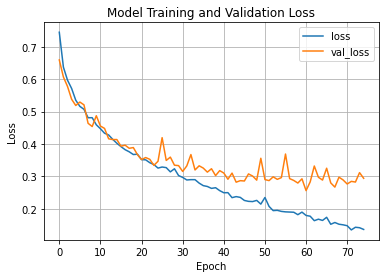

In [ ]:
# plotting loss
plot_loss(history)

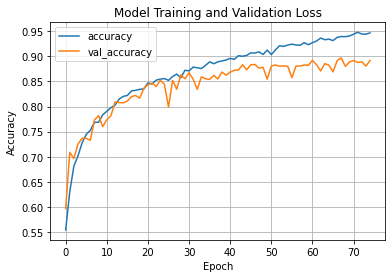

In [ ]:
# plotting accuracy
plot_accuracy(history)

## Kesimpulan:
- Dilihat dari perbandingan accuracy:
  - **model baseline** : val_accuracy dimulai dari 0.54 s/d 0.72 (mulai stannan di epoch 25) dan train accuracy dimulai dari 0.53 s/d 0.99 (terus naik) yang berarti pada model baseline terjadi overfitting setelah epoch 25 
  - **model deeper** : val_accuracy dimulai dari 0.59 s/d 0.89 (mualai stagnan di epoch 25) dan train accuracy dimulai dari 0.55 s/d 0.94 (terus naik) yang berarti pada model deeper cnn juga terjadi overfitting setelah epoch 25 namun tidak sbesar model baseline
  - Dilihat dari nilai accuracy model deeper cnn lebih baik accuracynya.
- Dilihat dari perbandingan nilai Loss:
  - **model baseline** : model loss terbaiknya pada epoch 12 (val_loss dan train loss dititik sama sebelum overfitting di epoch selanjutnya) dengan nilai val_loss = 0.60 dan train loss = 0.58.
  - **model deeper** : model loss terbaiknya pada epoch 22 (val_loss dan train loss dititik sama sebelum overfitting di epoch selanjutnya) dengan nilai val_loss = 0.35 dan train loss = 0.35.
  - Dilihat dari nilai loss model deeper memiliki nilai loss yang lebih kecil dibanding model baseline, pada epoch 22 dengan val_loss = 0.35. 
